<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Datasets
</font>
</h2

In [1]:
!gdown 14V69cqDFajVwm78ShJd8plYtOnEpH4Ql
!gdown 1PmHC7zmW00e1CpJY3M5-3Kl72__ycoG5
!gdown 1zhXPRoMiSKhqvxQSz5jDaHw2sthZGSbh

Downloading...
From: https://drive.google.com/uc?id=14V69cqDFajVwm78ShJd8plYtOnEpH4Ql
To: /content/amazon_test.csv
100% 3.82M/3.82M [00:00<00:00, 29.8MB/s]
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1PmHC7zmW00e1CpJY3M5-3Kl72__ycoG5

but Gdown can't. Please check connections and permissions.
Downloading...
From: https://drive.google.com/uc?id=1zhXPRoMiSKhqvxQSz5jDaHw2sthZGSbh
To: /content/amazon_valid.csv
100% 4.19M/4.19M [00:00<00:00, 18.5MB/s]


In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('amazon_train.csv')
valid = pd.read_csv('amazon_valid.csv')
test = pd.read_csv('amazon_test.csv')

In [4]:
train.head()

,UserID,ProductID,Rating,Timestamp
0,A3HICVLF4PFFMN,0594481813,5.0,2014-05-05
1,A2QBZA4S1ROX9Q,0594481813,3.0,2013-05-25
2,AT09WGFUM934H,0594481813,3.0,2013-08-31
3,AGAKHE014LQFU,0594481813,3.0,2013-09-18
4,A1S6B5QFWGVL5U,0594481813,4.0,2013-06-27


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909201 entries, 0 to 909200
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserID     909201 non-null  object 
 1   ProductID  909201 non-null  object 
 2   Rating     909201 non-null  float64
 3   Timestamp  909201 non-null  object 
dtypes: float64(1), object(3)
memory usage: 27.7+ MB


In [7]:
train['Rating'].value_counts(normalize=True)

5.0    0.598494
4.0    0.212489
3.0    0.084920
1.0    0.057540
2.0    0.046558
Name: Rating, dtype: float64

In [8]:
valid['Rating'].value_counts(normalize=True)

5.0    0.613808
4.0    0.196499
3.0    0.083675
1.0    0.059353
2.0    0.046664
Name: Rating, dtype: float64

<br></br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Preprocessing
</font>
</h2>

<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
1. Oversampling
</font>
</h3>

In [42]:
from imblearn.over_sampling import RandomOverSampler

sampling_strategy = {1: round(train['Rating'].value_counts()[1]*2.5),
                     2: round(train['Rating'].value_counts()[2]*3),
                     3: round(train['Rating'].value_counts()[3]*2)}

ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(train[['UserID', 'ProductID']], train['Rating'])

train_ros = pd.DataFrame(X_train_ros, columns=['UserID', 'ProductID'])
train_ros['Rating'] = y_train_ros

train_ros.head()

,UserID,ProductID,Rating
0,A3HICVLF4PFFMN,0594481813,5.0
1,A2QBZA4S1ROX9Q,0594481813,3.0
2,AT09WGFUM934H,0594481813,3.0
3,AGAKHE014LQFU,0594481813,3.0
4,A1S6B5QFWGVL5U,0594481813,4.0


In [43]:
train_ros['Rating'].value_counts(normalize=True)

5.0    0.473362
4.0    0.168062
3.0    0.134330
1.0    0.113774
2.0    0.110472
Name: Rating, dtype: float64

In [44]:
train = train_ros


<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
2. Encodding
</font>
</h3>

In [45]:
from sklearn.preprocessing import LabelEncoder

le_user = LabelEncoder()
train['UserEnc'] = le_user.fit_transform(train['UserID'].values)

le_product = LabelEncoder()
train['ProductEnc'] = le_product.fit_transform(train['ProductID'].values)

In [46]:
train.head()

,UserID,ProductID,Rating,UserEnc,ProductEnc
0,A3HICVLF4PFFMN,0594481813,5.0,59277,0
1,A2QBZA4S1ROX9Q,0594481813,3.0,41167,0
2,AT09WGFUM934H,0594481813,3.0,85549,0
3,AGAKHE014LQFU,0594481813,3.0,77047,0
4,A1S6B5QFWGVL5U,0594481813,4.0,18672,0


In [48]:
valid['UserEnc'] = le_user.transform(valid['UserID'].values)
valid['ProductEnc'] = le_product.transform(valid['ProductID'].values)

test['UserEnc'] = le_user.transform(test['UserID'].values)
test['ProductEnc'] = le_product.transform(test['ProductID'].values)

<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
3. Normalization
</font>
</h3>

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the Rating column
scaler = MinMaxScaler()
train['RatingNorm'] = scaler.fit_transform(np.array(train['Rating']).reshape(-1, 1))

train.head()

,UserID,ProductID,Rating,UserEnc,ProductEnc,RatingNorm
0,A3HICVLF4PFFMN,0594481813,5.0,59277,0,1.00
1,A2QBZA4S1ROX9Q,0594481813,3.0,41167,0,0.50
2,AT09WGFUM934H,0594481813,3.0,85549,0,0.50
3,AGAKHE014LQFU,0594481813,3.0,77047,0,0.50
4,A1S6B5QFWGVL5U,0594481813,4.0,18672,0,0.75


In [54]:
valid['RatingNorm'] = scaler.transform(np.array(valid['Rating']).reshape(-1, 1))

<br></br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Model
</font>
</h2>


In [50]:
import keras
# Building the model

N_USERS = train['UserEnc'].nunique()
N_ITEMS = train['ProductEnc'].nunique()
EMBEDDING_SIZE = 200


# User
input_user = keras.layers.Input(shape = (1,),
                                dtype = 'int64',
                                name = 'input_user')

embedding_user = keras.layers.Embedding(N_USERS, EMBEDDING_SIZE,
                                        embeddings_initializer = 'he_normal',
                                        name = 'embedding_user')(input_user)

embedding_user = keras.layers.Flatten()(embedding_user)

embedding_user_bias = keras.layers.Embedding(N_USERS, 1,
                                        embeddings_initializer = 'he_normal',
                                        name = 'embedding_user_bias')(input_user)

embedding_user_bias = keras.layers.Flatten()(embedding_user_bias)

# Product
input_product = keras.layers.Input(shape = (1,),
                                dtype = 'int64',
                                name = 'input_product')

embedding_product = keras.layers.Embedding(N_ITEMS, EMBEDDING_SIZE,
                                        embeddings_initializer = 'he_normal',
                                        name = 'embedding_product')(input_product)

embedding_product = keras.layers.Flatten()(embedding_product)

embedding_product_bias = keras.layers.Embedding(N_ITEMS, 1,
                                        embeddings_initializer = 'he_normal',
                                        name = 'embedding_product_bias')(input_product)

embedding_product_bias = keras.layers.Flatten()(embedding_product_bias)

# User-Product Interaction and Output
interaction = keras.layers.dot([embedding_user, embedding_product], axes = 1)
interaction = keras.layers.add([interaction, embedding_user_bias, embedding_product_bias])
output = keras.layers.Activation('sigmoid')(interaction)

# Final model
model = keras.models.Model([input_user, input_product], output)

In [51]:
# Training phase
model.compile(optimizer=keras.optimizers.Adam(0.001), loss='binary_crossentropy')

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_user (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 input_product (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 embedding_user (Embedding)  (None, 1, 200)               1801000   ['input_user[0][0]']          
                                                          0                                       
                                                                                                  
 embedding_product (Embeddi  (None, 1, 200)               9753800   ['input_product[0][0]']   

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True)

In [56]:
history = model.fit([train['UserEnc'], train['ProductEnc']], train['RatingNorm'],
                    batch_size=64, epochs=7, callbacks=[checkpoint_cb],
                    validation_data=([valid['UserEnc'], valid['ProductEnc']], valid['RatingNorm']))

Epoch 1/7
17962/17962 [==============================] - 172s 9ms/step - loss: 0.5841 - val_loss: 0.5216
Epoch 2/7
17962/17962 [==============================] - 167s 9ms/step - loss: 0.3505 - val_loss: 0.4818
Epoch 3/7
17962/17962 [==============================] - 168s 9ms/step - loss: 0.2900 - val_loss: 0.4813
Epoch 4/7
17962/17962 [==============================] - 174s 10ms/step - loss: 0.2847 - val_loss: 0.4874
Epoch 5/7
17962/17962 [==============================] - 184s 10ms/step - loss: 0.2845 - val_loss: 0.4922
Epoch 6/7
17962/17962 [==============================] - 177s 10ms/step - loss: 0.2832 - val_loss: 0.4970
Epoch 7/7
17962/17962 [==============================] - 164s 9ms/step - loss: 0.2836 - val_loss: 0.5002


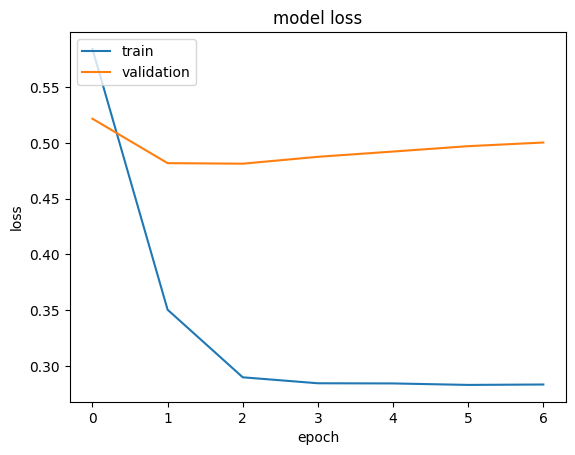

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

<br><br>
<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Prediction
</font>
</h2>

In [ ]:
model = keras.models.load_model("model.keras")

In [59]:
# Evaluate on validation data
from sklearn.metrics import precision_score

predictions = model.predict([valid['UserEnc'], valid['ProductEnc']])
predictions = scaler.inverse_transform(predictions)
predictions = np.round(predictions)
predictions[predictions < 4] = 0
predictions[predictions >= 4] = 1

true_rating = valid['Rating'].values.copy()
true_rating[true_rating < 4] = 0
true_rating[true_rating >= 4] = 1

result = precision_score(true_rating, predictions) * 100
print(result)

2810/2810 [==============================] - 8s 3ms/step
84.29322831315747


In [63]:
predictions = model.predict([test['UserEnc'], test['ProductEnc']])
predictions = scaler.inverse_transform(predictions)
predictions = np.round(predictions)

2805/2805 [==============================] - 6s 2ms/step


In [64]:
# Preparing submission file
submission = test.copy()
submission['Rating'] = predictions
submission = submission[['UserID', 'ProductID', 'Rating']]
submission

,UserID,ProductID,Rating
0,A2Y3A341VDK37H,B00HFI55N2,4.0
1,A240FRPD4MEXND,B00KIMX4EY,5.0
2,A3SBTW3WS4IQSN,B001IF252M,4.0
3,A1QCZQTJNK3MU,B00J46VVKE,5.0
4,A16JT7E5121OAB,B00JZC972Q,3.0
...,...,...,...
89727,A37Z65SZVT0TVB,B00005AR4L,2.0
89728,A3PLX6PTM2ERKL,B00004Z6PI,5.0
89729,A3TRPVAGT3NWBS,B00005NVPW,4.0
89730,AY8Q1X7G96HV5,B000059MSI,3.0


<br></br>
<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بیشتر بدانید:
سیستم پیشنهاددهنده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای پیشنهاد کالای جدید به یک کاربر روش‌های مختلفی وجود دارد، اما یک راه ساده این است که از تخمین امتیازی که مدل به‌ازای هر جفت کاربر و کالا می‌دهد استفاده کنیم.
به‌ازای یک کاربر به‌کمک مدل خود تخمین می‌زنیم که وی از بین کالاهایی که تاکنون خریداری نکرده، کدام‌ها را بیشتر از همه دوست خواهد داشت و امتیاز بالاتری به آن‌ها خواهد داد. بنابراین می‌توانیم این کالاها را به او پیشنهاد دهیم و به‌احتمال زیاد از تعدادی از آن‌ها خوشش خواهد آمد. البته این موضوع نمی‌تواند مستقیماً به این معنی باشد که آن کالا را خریداری می‌کند. به‌عنوان مثال شاید یک کالای گران‌قیمت را پیشنهاد دهیم که همگی از آن خوشمان می‌آید اما بسیاری قدرت خرید آن را نداریم! 🫠
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایي:</b></span>
برای تولید پیش‌بینی به‌ازای یک کاربر ابتدا لیستی از کالاهایی که وی تاکنون خریداری نکرده را پیدا کنید. سپس جفت شناسه‌ی کدگذاری‌شده‌ی کاربر و هر یک از این کالاها را به مدل ورودی بدهید تا امتیاز کاربر به هر کدام از آن کالاها تخمین زده شود. در نهایت می‌توان <code>n</code> کالایی که منجر به بیشترین امتیاز (خروجی مدل) شده را انتخاب کرد و به وی پیشنهاد داد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>🧐 بیشتر بی‌اندیشیم:</b></span>
چه روش‌های دیگری جهت پیشنهاد کالا به یک کاربر مشخص به ذهن‌تان می‌رسد؟ آیا می‌توان مستقیماً‌ از بردارهای تعبیه‌ی هر کالا یا کاربر جهت پیشنهاد استفاده کرد؟ به چه روش‌های می‌توان کاربران مشابه با یک کاربر را پیدا کرده و براساس تجربه یا الگوی خرید آن‌ها به کاربر کالاهایی را پیشنهاد داد؟ پیشنهاد می‌کنیم به این موضوعات بیشتر فکر کرده و نظرات خود را از طریق بخش دیدگاه عمومی صفحه‌ی پروژه در کوئرا با دیگران به‌اشتراک بگذارید. چه بهتر که ایده‌های خود را به‌شکل عملی نیز آزمایش کنید.
</font>
</p>

In [ ]:
def get_top_recommendations(sample_df, user_id_enc, top_n=3):

  product_bought_by_user = sample_df[sample_df['UserEnc'] == user_id_enc]
  product_not_bought = sample_df[~sample_df['ProductEnc'].isin(product_bought_by_user['ProductEnc'].values)]

  X_test_a = np.array([user_id_enc for i in range(0, len(product_not_bought['ProductEnc'].unique()))], dtype=np.float64)
  X_test_b = np.array(product_not_bought['ProductEnc'].unique(), dtype=np.float64)

  ratings = model.predict([X_test_a, X_test_b], verbose=0).flatten()
  top_ratings_indices = ratings.argsort()[-top_n:][::-1]

  pr = []
  for i in top_ratings_indices:
    tmp = product_not_bought['ProductEnc'].unique()[i]
    pr.append(df[df['ProductEnc']==tmp].iloc[0]['ProductID'])

  return pr

In [ ]:
get_top_recommendations(train, 59277, 3)